In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile
from IPython.display import Audio
%matplotlib inline
import os

from sklearn.decomposition import FastICA

from mcc import mean_corr_coef as mcc

In [2]:
f, x1 = scipy.io.wavfile.read('mixed_audios/4components/mixed_1.wav')

f, x2 = scipy.io.wavfile.read('mixed_audios/4components/mixed_2.wav')

f, x3 = scipy.io.wavfile.read('mixed_audios/4components/mixed_3.wav')

f, x4 = scipy.io.wavfile.read('mixed_audios/4components/mixed_4.wav')

In [3]:
X = np.array([x1, x2, x3, x4])

In [4]:
X = X.T

In [5]:
transformer = FastICA(n_components=4, random_state=0, whiten=True)

S_est = transformer.fit_transform(X)

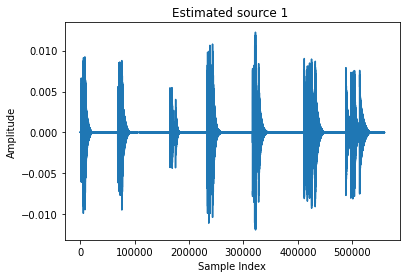

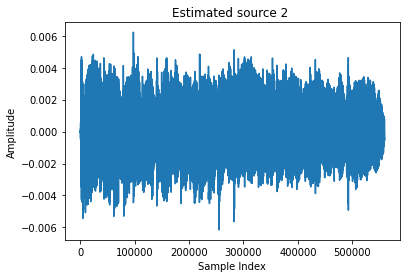

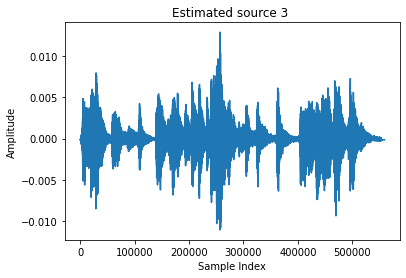

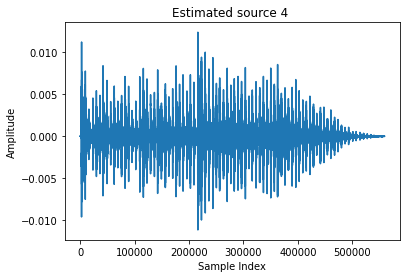

In [7]:
# Visualize and play estimated sources
for i in range(S_est.shape[1]):

    s = S_est[:,i]

    # plot waveform
    plt.figure()
    plt.plot(s)
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.title('Estimated source %d ' % (i+1))
    plt.show()

    # Play audio
    aud = Audio(s, rate=f)
    display(aud)

In [11]:
f, s1 = scipy.io.wavfile.read('sources/acoustic.wav')

f, s2 = scipy.io.wavfile.read('sources/bubbles.wav')

f, s3 = scipy.io.wavfile.read('sources/logdrums.wav')

f, s4= scipy.io.wavfile.read('sources/piano.wav')

In [12]:
S = np.array([s1, s2, s3, s4])

S = S.T

In [13]:
mcc(S_est, S)

0.9999279406724849